In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import cudf

In [ ]:
!pip install plotly-express

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/train_kaggle.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

<ipython-input-138-65ee39f1e23c>:5: DtypeWarning:

Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.



,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
df.rename(columns={'cluster_catgeory': 'cluster_category'}, inplace=True)

In [ ]:
df.columns

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_category'],
      dtype='object')

In [ ]:
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 774155
Number of columns: 6


In [ ]:
# Overview of the dataset
data_info = df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_category  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
missing_values = df.isnull().sum()
missing_values

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_category     1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
missing_values = df.isnull().sum()
missing_values

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
dtype: int64

In [ ]:
# Overview of the dataset
data_info = df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
Index: 774061 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774061 non-null  float64
 1   outlet_city       774061 non-null  object 
 2   luxury_sales      774061 non-null  object 
 3   fresh_sales       774061 non-null  object 
 4   dry_sales         774061 non-null  object 
 5   cluster_category  774061 non-null  object 
dtypes: float64(1), object(5)
memory usage: 41.3+ MB


In [ ]:
# Add Customer_ID as int
df['Customer_ID'] = df['Customer_ID'].astype(int)

# Replace non-numeric values with NaN in 'luxury_sales' column
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')

# Convert 'luxury_sales' to float
df['luxury_sales'] = df['luxury_sales'].astype(float)

# Repeat the same steps for 'fresh_sales' and 'dry_sales' if needed

# Convert 'fresh_sales' to float
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce').astype(float)

# Convert 'dry_sales' to float
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce').astype(float)


In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832,Kelaniya,1209.60,756.00,5292.00,4
1,10178643,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916,Wattala,2288.88,1481.04,9155.52,4
3,10334589,Wattala,2274.94,1739.66,9099.76,4
4,10458365,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774061 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774061 non-null  int64  
 1   outlet_city       774061 non-null  object 
 2   luxury_sales      774051 non-null  float64
 3   fresh_sales       774052 non-null  float64
 4   dry_sales         774053 non-null  float64
 5   cluster_category  774061 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 41.3+ MB


In [ ]:
# Check the unique values in the 'cluster_category' column
print(df['cluster_category'].unique())


['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 100.0 89.0]


In [ ]:
# Count the occurrences of each value in the 'cluster_category' column
print(df['cluster_category'].value_counts())

cluster_category
1        188950
6        169197
2        155045
4        131027
3         48889
4         41400
5         39516
5             9
1             9
6             8
2             4
3             1
6\            1
95            1
98            1
99            1
100.0         1
89.0          1
Name: count, dtype: int64


In [ ]:
unique_values = df['cluster_category'].unique()
for value in unique_values:
    print(value)

4
1
99
2
5
3
6
6\
4
2
1
95
3
98
5
6
100.0
89.0


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Convert non-numeric values to NaN
df['cluster_category'] = pd.to_numeric(df['cluster_category'], errors='coerce')

# Remove NaN values and values not between 1 and 6
df = df[(df['cluster_category'].notna()) & (df['cluster_category'] >= 1) & (df['cluster_category'] <= 6)]

# Convert to integer
df['cluster_category'] = df['cluster_category'].astype(int)

# Print the unique integer values
unique_values = df['cluster_category'].unique()
for value in unique_values:
    print(value)


4
1
2
5
3
6


<ipython-input-153-3f31993d1d45>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Count the occurrences of each value in the 'cluster_category' column
print(df['cluster_category'].value_counts())

cluster_category
1    188959
4    172427
6    169205
2    155049
3     48890
5     39525
Name: count, dtype: int64


In [ ]:
# Check the unique values in the 'cluster_category' column
print(df['outlet_city'].unique())

['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy']


In [ ]:
# Count the occurrences of each value in the 'cluster_category' column
print(df['outlet_city'].value_counts())

outlet_city
Colombo                   41023
Batticaloa                41009
Galle                     41005
Kalmunai                  40708
Negombo                   40696
Jaffna                    40672
Katunayake                40642
Kandy                     40530
Trincomalee               40525
Gampaha                   40242
Peliyagoda                37143
Nuwara Eliya              37099
Dehiwala-Mount Lavinia    36833
Kotte                     36784
Panadura                  36724
Wattala                   36716
Kaduwela                  36690
Homagama                  36635
Moratuwa                  36412
Kelaniya                  35967
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774055 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774055 non-null  int64  
 1   outlet_city       774055 non-null  object 
 2   luxury_sales      774045 non-null  float64
 3   fresh_sales       774046 non-null  float64
 4   dry_sales         774047 non-null  float64
 5   cluster_category  774055 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 41.3+ MB


In [ ]:
import plotly.express as px

# Group the data by 'outlet_city' and count the occurrences
city_distribution = df['outlet_city'].value_counts().reset_index()
city_distribution.columns = ['outlet_city', 'count']

# Plot the distribution using Plotly
fig = px.bar(city_distribution, x='outlet_city', y='count',
             labels={'outlet_city': 'Outlet City', 'count': 'Count'},
             title='Distribution of Outlet Cities')
fig.show()


In [ ]:
import plotly.express as px

# Group the data by 'cluster_category' and count the occurrences
cluster_distribution = df['cluster_category'].value_counts().reset_index()
cluster_distribution.columns = ['cluster_category', 'count']

# Plot the distribution using Plotly
fig = px.bar(cluster_distribution, x='cluster_category', y='count',
             labels={'cluster_category': 'Cluster Category', 'count': 'Count'},
             title='Distribution of Cluster Categories')
fig.show()


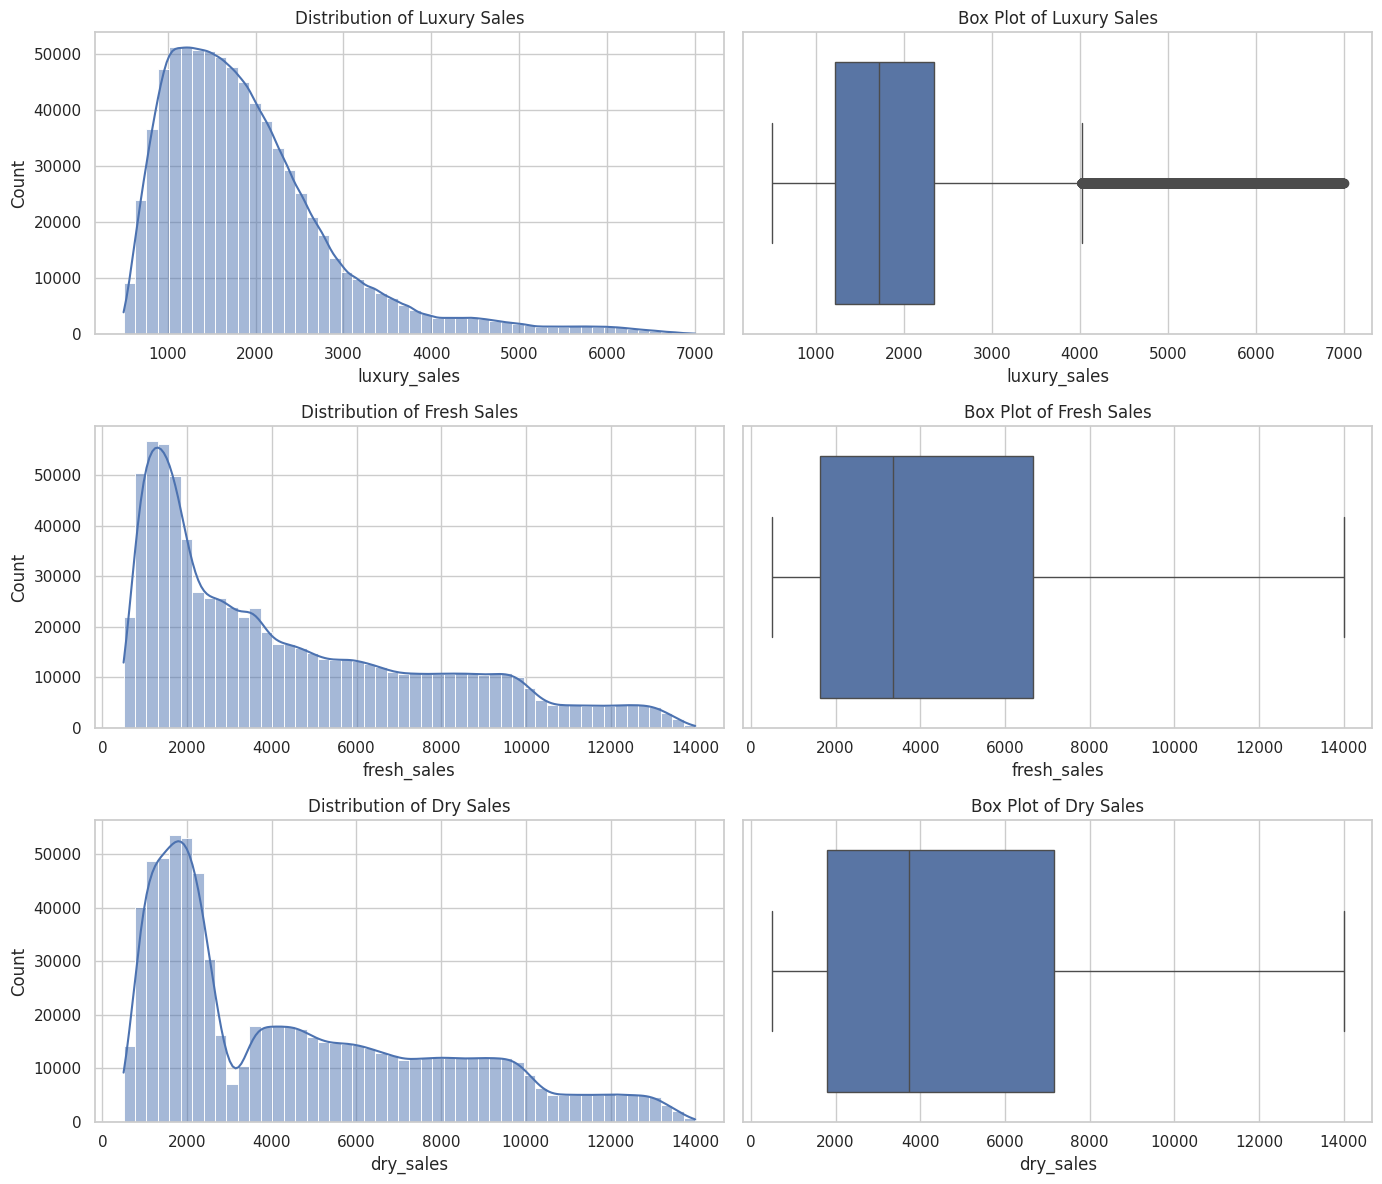

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style
sns.set(style="whitegrid")

# Plotting histograms and box plots for numerical features
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Luxury Sales
sns.histplot(df['luxury_sales'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Luxury Sales')

sns.boxplot(x=df['luxury_sales'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Luxury Sales')

# Fresh Sales
sns.histplot(df['fresh_sales'], bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Fresh Sales')

sns.boxplot(x=df['fresh_sales'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Fresh Sales')

# Dry Sales
sns.histplot(df['dry_sales'], bins=50, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Distribution of Dry Sales')

sns.boxplot(x=df['dry_sales'], ax=axes[2, 1])
axes[2, 1].set_title('Box Plot of Dry Sales')

plt.tight_layout()
plt.show()


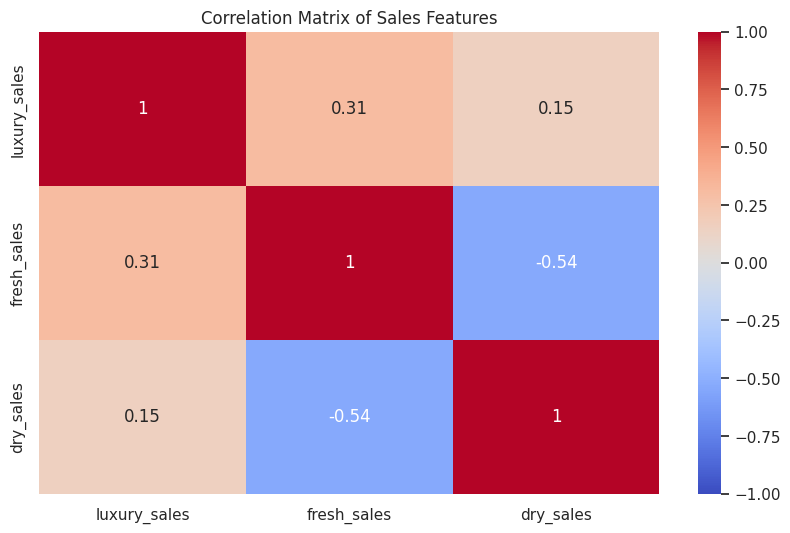

In [ ]:
# Correlation analysis
correlation_matrix = df[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Sales Features')
plt.show()


In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832,Kelaniya,1209.60,756.00,5292.00,4
1,10178643,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916,Wattala,2288.88,1481.04,9155.52,4
3,10334589,Wattala,2274.94,1739.66,9099.76,4
4,10458365,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774055 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774055 non-null  int64  
 1   outlet_city       774055 non-null  object 
 2   luxury_sales      774045 non-null  float64
 3   fresh_sales       774046 non-null  float64
 4   dry_sales         774047 non-null  float64
 5   cluster_category  774055 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 41.3+ MB


In [ ]:
df.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category
count,7.740550e+05,774045.000000,774046.000000,774047.000000,774055.00000
mean,1.038707e+07,1921.946239,4428.723885,4676.285969,3.29213
std,2.234814e+05,1004.039236,3334.725458,3409.415732,1.86703
min,1.000000e+07,500.000000,500.000000,500.000000,1.00000
25%,1.019353e+07,1213.530000,1620.160000,1787.920000,2.00000
50%,1.038707e+07,1715.280000,3356.510000,3727.760000,3.00000
75%,1.058061e+07,2338.690000,6671.700000,7162.300000,5.00000
max,1.077415e+07,6999.650000,13997.900000,13999.300000,6.00000


In [ ]:
# Specify the file path where you want to save the CSV file
file_path = 'cleaned_data.csv'

# Save the DataFrame as a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude DataFrame index from the CSV

# ML MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical features
categorical_features = ['outlet_city']
numeric_features = data.drop(columns=['Customer_ID', 'outlet_city', 'cluster_category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Prepare features and labels
X = data.drop(columns=['Customer_ID', 'cluster_category'])
y = data['cluster_category']

# Apply transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
X_transformed_imputed = imputer.fit_transform(X_transformed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_imputed, y, test_size=0.2, random_state=42)

# Reduce the data size to 1% for faster training and evaluation
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.01, random_state=42)

# Initialize and train Random Forest model on the smaller subset
rf_model_small = RandomForestClassifier(random_state=42)
rf_model_small.fit(X_train_small, y_train_small)

# Evaluate the model on the test set
rf_predictions_small = rf_model_small.predict(X_test)
rf_accuracy_small = accuracy_score(y_test, rf_predictions_small)

print(f'Random Forest model accuracy: {rf_accuracy_small}')


Random Forest model accuracy: 0.9996770255343612


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Load the training and test datasets
train_data = pd.read_csv('/content/cleaned_data.csv')
test_data = pd.read_csv('/content/test_kaggle_new.csv')

# Prepare the training data
categorical_features = ['outlet_city']
numeric_features = train_data.drop(columns=['Customer_ID', 'outlet_city', 'cluster_category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Prepare features and labels for training data
X_train_data = train_data.drop(columns=['Customer_ID', 'cluster_category'])
y_train_data = train_data['cluster_category']

# Apply transformations to the training features
X_train_transformed = preprocessor.fit_transform(X_train_data)

# Fill missing values with mean for training data
imputer = SimpleImputer(strategy='mean')
X_train_transformed_imputed = imputer.fit_transform(X_train_transformed)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed_imputed, y_train_data)

# Prepare the test data
X_test_data = test_data.drop(columns=['Customer_ID'])

# Apply the same transformations to the test features
X_test_transformed = preprocessor.transform(X_test_data)

# Fill missing values with mean for test data
X_test_transformed_imputed = imputer.transform(X_test_transformed)

# Predict the cluster categories for the test data
test_predictions = rf_model.predict(X_test_transformed_imputed)

# Create the submission DataFrame
submission = pd.DataFrame({
    'Customer_ID': test_data['Customer_ID'],
    'cluster_category': test_predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('kaggle_submission.csv', index=False)

print('Submission file created: kaggle_submission.csv')


Submission file created: kaggle_submission.csv
